# Strojové učení s využitím regrese a klasifikace

## Úvod

Co je to strojové učení a rozdíl mezi klasifikací a regresí už jsme si říkali v minulé otázce. Zde si zkusíme nějaký model vytrénovat, ukážeme si metody ladění hyperparametrů a metriky pro měření kvality modelu.                     
Co si zde ale zmíníme je, že strojové učení lze ještě rozdělit na učení s učitelem a bez něj. Učení s učitelem je to, které budeme provádět my, známe cílovou proměnnou, můžeme model kontrolovat a ladit podle ní. V učení bez učitele cílovou proměnnou neznáme. Je to třeba hledání anomálií, nebo clustering (toho se využívá např. při zjišťování, co dále nabídnout zákazníkovy na základě toho, do jaké skupiny/clusteru patří). Ačkoliv je to velká část strojového učení, my se jí zde nebudeme zabývat. Je ale dobré o ní vědět.

**Potřebné knihovny**

In [ ]:
!pip install ucimlrepo
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install joblib
!pip install matplotlib
!pip install seaborn
!pip install lightgbm
!pip install ucimlrepo
!pip install optuna
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **1** Regrese

## **2** Klasifikace

Klasifikaci si ukážeme na jednoduchém datasetu z knihovny ucimlrepo. V tomto datasetu se budeme snažit odhadnout stáří abalonu, to je jakási mušle. Většina proměnných je číselných, jedinou kategorickou převedu bez dalšího vysvětlování na číselné hodnoty. Zkusíme několik různých algoritmů, které si předtím popíšeme. Nakonec naše algoritmy zhodnotíme a porovnáme mezi sebou.

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = fetch_ucirepo(id=1)

X = data.data.features
y = data.data.targets

df = pd.concat([X, y], axis=1, join="inner")
df

encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(df[['Sex']])
df = pd.concat([df.drop('Sex', axis=1), pd.DataFrame(data=sex_encoded.toarray(), columns=encoder.get_feature_names_out())], axis=1)

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


![Abalone](abalone.jpg)

Datová sada by neměla obsahovat ani prázdné hodnoty ani duplicitní řádky, takže o to se starat nemusíme. Cílovou proměnnou už máme také převedenou na čísla, všechny fíčury jsou také spojité reálné hodnoty. Později si tedy maximálně hodnoty normalizujeme či standardizujeme a podíváme se na ně pomocí grafu.                     
Ještě před tím, než se podíváme na jednotlivé modely k dispozici, musíme si datovou sadu rozdělit na trénovací, validační a testovací data.

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Podíváme se teď na různé modely pro klasifikaci a každý z nich si vytrénujeme, vyladíme pro něj hyperparametry a zhodnotíme si ho. Modely nakonec porovnáme mezi sebou.

### Trénování

#### Logistická regrese

Chcete-li vědět, jak konkrétně funguje logistická regrese, budete se nejspíš muset podívat na internet. Nicméně z praxe. Hodí se při binární klasifikaci. Nicméně zvládá i vícetřídní. V podstatě pomocí nafitované fce rozdělí, s jakou pravděpodobností patří vzorek do jaké třídy. Pro fungování bylo potřeba změnit solver, proč konkrétně a co to konkrétně znamená, to vám asi nepovím, nicméně to má určitě co dočinění s tím, že provádíme vícetřídní klasifikaci.

In [57]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='newton-cg')
logistic.fit(X_train, y_train)
logistic_predictions = logistic.predict(X_test)

#### Rozhodovací strom

Rozhodovací stromy jsou velmi oblíbeným algoritmem strojového učení. V dnešní době jsou v rámci klasického strojového učení algoritmy postavené na nich vlastně jediné, které se stále využívají a dovedou alespoň trochu konkurovat neuronovým sítím. My si zde vytrénujeme klasický rozhodovací strom, nicméně metody založené na gradient boostingu jsou dnes mnohem oblíbenější a účinnější.                
Jak rozhodovací strom funguje? Vytváří uzly. Každý z nich se jednoduše ptá, zde je nějaká fíčura větší či menší než nějaký treshold. Podle toho ji vyšle do pravého uzlu, či do levého uzlu. Jakmile dojde někam do listu, vybere nejčastější třídu, která zde při trénování spadla, a tu prohlásí za cílovou třídu tohoto listu.

![Decision Tree Classifier](decision_tree_classifier.jpg)

In [37]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
decisionTree_predictions = decisionTree.predict(X_test)

#### Náhodný les

Protože složitější algoritmy strojového učení nejsou deterministické, může při opakovaném spuštění vzniknout jiný strom. Toho se využívá v případě náhodného lesa, který je příkladem tzv. ensemble algoritmu. Tedy takového, který hodnotitelů vytvoří více a výstup je v tomto případě nejčastější hodnota, kterou stromy odhadovaly.

![Random Forest Classifier](random_forest_classifier.gif)

In [36]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
randomForest_predictions = randomForest.predict(X_test)

#### Support Vector Machine (SVM)

TEXT

In [53]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

#### K nejbližších sousedů (KNN)

Algoritmus KNN funguje zhruba následovně. Při trénování si vytvoří mapku tránovacích dat v hyperprostoru. Když pak zařazuje nová data, prostě je do tohoto prostoru umístí a spočítá vzdálenost od přesně daného počtu bodů. Podle toho, ke které třídě je nejblíže, je zařazen.

![KNN](knn.jpg)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

### Zhodnocení modelu

Máme spoustu metrik určených k hodnocení našeho modelu. Prvním z nich, ačkoliv to není tak úplně metrika, je tzv. konfuzní matice. Ta zobrazuje počty správně a špatně zařazených tříd. Zde je obrázek takové matice pro binární klasifikaci. Máme-li více tříd, pro každou v matici přibyde sloupec a řádek.

![Confusion Matrix](confusion_matrix.png)

Další klasickou metrikou je Accuracy (Přesnost). Tu lze z konfuzní matice spočítat následujícím způsobem:

![Accuracy](accuracy.png)

Tedy je to poměr mezi správně začleněnými třídami a všemi třídami. Dovede být dobrou metrikou, nicméně naráží na zásadní problém, nevyváženost tříd. Pokud bychom zkoumali jev, který je docela vzácný, a poměr našich tříd by byl třeba 1:10, model by mohl všechno zařadit do většinové třídy a stále by měl dobrou accuracy.                     
V takových případech se hodí jiná metrika, precision. Precision kouká na to, jak spolehlivě dovede náš model odhadnout správnou třídu. Ku příkladu, měli bychom dataset a rozhodovali bychom se, zda má dotyčný rakovinu nebo ne. Úplně nechceme na chemošku posílat někoho, kdo rakovinu nemá. Je tak pro nás důležitý precision, protože zohledňuje, jak je si model jistý tím, když o někom řekne, že rakovinu má.               
Velmi krásně by to bylo vidět např. u datasetu, kde by byly od druhé třídy jen 3 instance třeba ze 100. Náš model by vše zařadil do většinové třídy, jeho accuracy by bylo 97%, 97 ze 100 zařadil správně. Nicméně jeho precision bude 0%. Vzorec pro výpočet precisionu je zde:

![Precision](precision.png)

Existuje také metrika, které říkáme recall (citlivost modelu). Měří, kolik z instancí třídy model skutečně odhalil. Opět má stejný problém jako accuracy. Pokud náš model všechno zařadí do jedné třídy, recall může být 100%, náš model skutečně odhalil všechno. Ale to, že tam také zařadil všechno, už recall nezohledňuje. Recall chceme využít, je-li pro nás důležité, aby všechny instance byly opravdu odhaleny, ale v případě chyby se svět nezboří. Např. v bezpečnosti chceme raději vědět všechno, ačkoliv to může být planý poplach. Tady je vzoreček:

![Recall](recall.png)

Jak vidíme, jedna metrika nikdy nestačí. Proto je důležité, abychom využívali nejlépe všechn najednou. Existují metriky, které zohledňují i precision i recall zároveň. Třeba tzv. F1 score. To je harmonický průměr mezi recall a precision. Protože je prakticky těžko interpretovatelný, využívá se např. při porovnávání modelů. Zde vzorec:

![F1 Score](f1_score.jpg)

F score se dá i zobecnit podle toho, jakou zvolíme váhu. Je to tzv. f-beta score. F0.5 třeba znamená, že precision je 4x důležitější než recall. F2 to má naopak. Můžeme si tedy naše porovnávácí skóre upravovat dle našich potřeb.                        
Máme-li vícetřídní klasifikaci, můžeme si ještě vybírat mezi tzv. micro a macro metrikou, popř. weighted. Micro je v podstatě naše klasické F1 skóre (popř. jiná metrika, nezávisí na tom). Sečtou se všechny správně klasifikované a vydělí se to všemi klasifikovanými. Obojí nezávisle na třídě.

![Micro F1](f1_micro.jpg)

Macro už je trochu chytřejší. Spočítá danou metriku pro každou třídu a pak je zprůměruje.

![Macro F1](macro_f1.jpg)

Nakonec. Když chceme zohlednit i to, že naše třídy jsou nevyvážené, musíme jednotlivým třídám přidat váhu na základě jejich četnosti.

![Weighted F1](wighted_f1.jpg)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Logistická regrese

In [58]:
accuracy_score(y_test, logistic_predictions)

0.26435406698564595

In [59]:
display(precision_score(y_test, logistic_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, logistic_predictions, average='macro', zero_division=0.0))
precision_score(y_test, logistic_predictions, average='weighted', zero_division=0.0)

0.26435406698564595

0.07651434002259638

0.19279030750654144

In [60]:
display(recall_score(y_test, logistic_predictions, average='micro'))
display(recall_score(y_test, logistic_predictions, average='macro'))
recall_score(y_test, logistic_predictions, average='weighted')

0.26435406698564595

0.10148493330256805

0.26435406698564595

In [61]:
display(f1_score(y_test, logistic_predictions, average='micro'))
display(f1_score(y_test, logistic_predictions, average='macro'))
f1_score(y_test, logistic_predictions, average='weighted')

0.26435406698564595

0.08605587297623912

0.22008615281044122

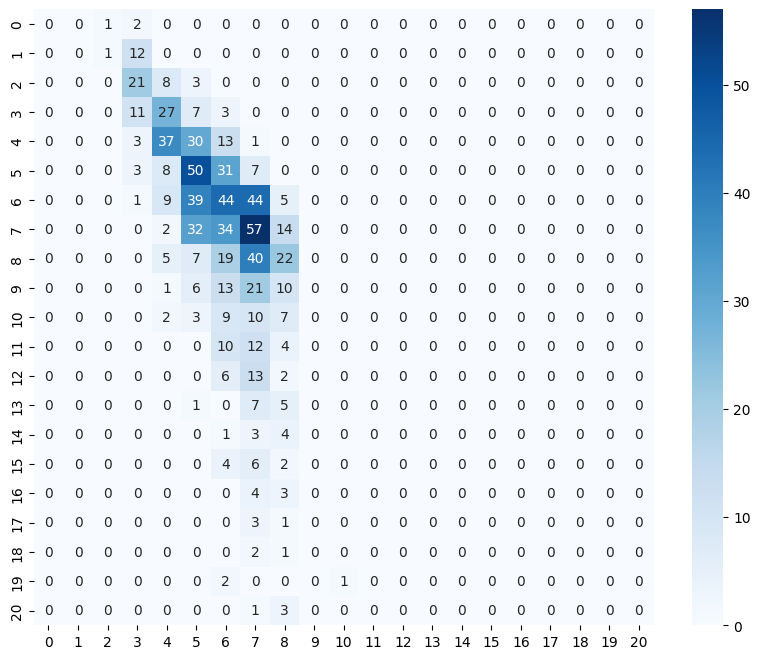

In [62]:
matrix = confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### Rozhodovací strom

In [ ]:
accuracy_score(y_test, decisionTree_predictions)

0.2069377990430622

In [23]:
display(precision_score(y_test, decisionTree_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, decisionTree_predictions, average='macro', zero_division=0.0))
precision_score(y_test, decisionTree_predictions, average='weighted', zero_division=0.0)

0.2069377990430622

0.14188328887132085

0.20767083343018758

In [ ]:
display(recall_score(y_test, decisionTree_predictions, average='micro'))
display(recall_score(y_test, decisionTree_predictions, average='macro'))
recall_score(y_test, decisionTree_predictions, average='weighted')

0.2069377990430622

0.16399053460650703

0.2069377990430622

In [24]:
display(f1_score(y_test, decisionTree_predictions, average='micro'))
display(f1_score(y_test, decisionTree_predictions, average='macro'))
f1_score(y_test, decisionTree_predictions, average='weighted')

0.2069377990430622

0.1475438404617056

0.20499961358144034

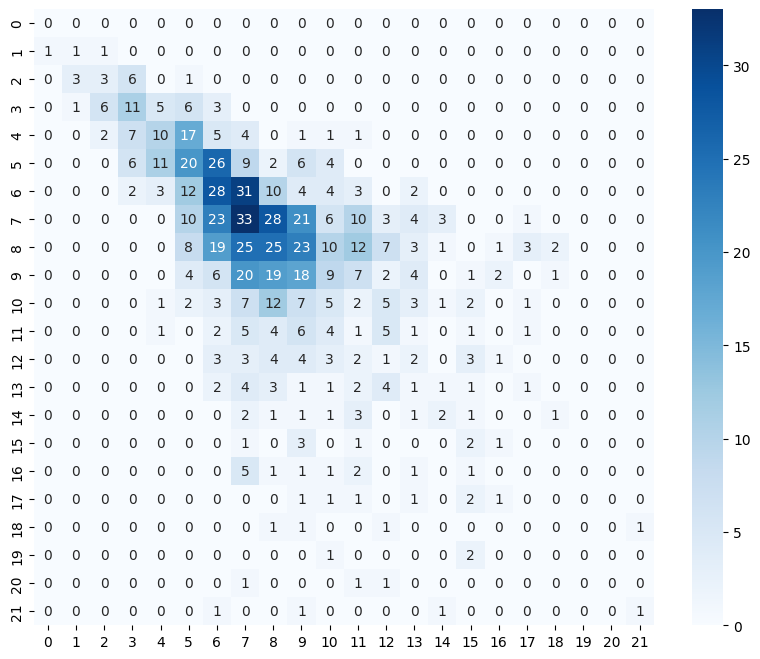

In [41]:
matrix = confusion_matrix(y_test, decisionTree_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### Náhodný les

In [29]:
accuracy_score(y_test, randomForest_predictions)

0.2607655502392344

In [30]:
display(precision_score(y_test, randomForest_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, randomForest_predictions, average='macro', zero_division=0.0))
precision_score(y_test, randomForest_predictions, average='weighted', zero_division=0.0)

0.2607655502392344

0.15347324527941192

0.24667924401912197

In [31]:
display(recall_score(y_test, randomForest_predictions, average='micro'))
display(recall_score(y_test, randomForest_predictions, average='macro'))
recall_score(y_test, randomForest_predictions, average='weighted')

0.2607655502392344

0.1526215084323243

0.2607655502392344

In [32]:
display(f1_score(y_test, randomForest_predictions, average='micro'))
display(f1_score(y_test, randomForest_predictions, average='macro'))
f1_score(y_test, randomForest_predictions, average='weighted')

0.2607655502392344

0.14778480506592945

0.24908738619693616

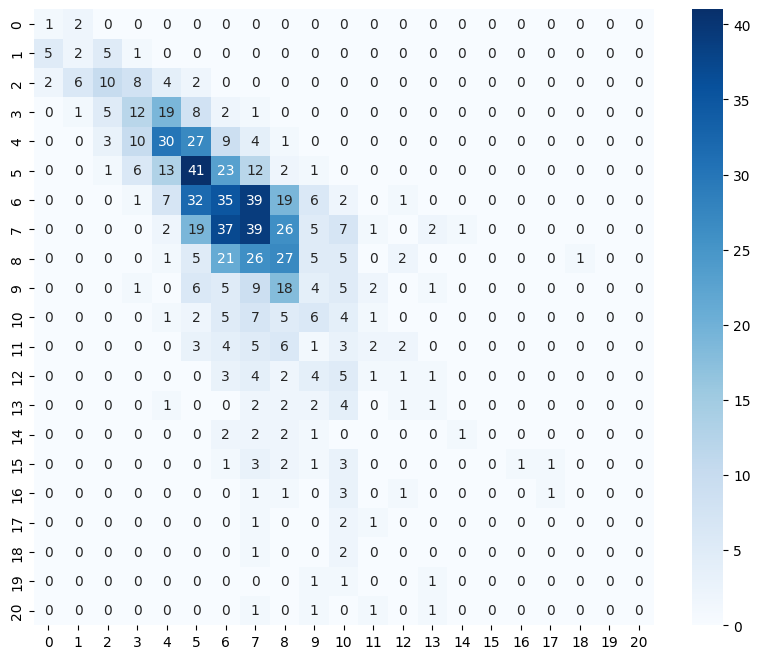

In [42]:
matrix = confusion_matrix(y_test, randomForest_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### Support Vector Machine (SVM)

In [63]:
accuracy_score(y_test, svc_predictions)

0.26555023923444976

In [64]:
display(precision_score(y_test, svc_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, svc_predictions, average='macro', zero_division=0.0))
precision_score(y_test, svc_predictions, average='weighted', zero_division=0.0)

0.26555023923444976

0.0778297722773132

0.19642272718249285

In [65]:
display(recall_score(y_test, svc_predictions, average='micro'))
display(recall_score(y_test, svc_predictions, average='macro'))
recall_score(y_test, svc_predictions, average='weighted')

0.26555023923444976

0.10085289086215041

0.26555023923444976

In [66]:
display(f1_score(y_test, svc_predictions, average='micro'))
display(f1_score(y_test, svc_predictions, average='macro'))
f1_score(y_test, svc_predictions, average='weighted')

0.26555023923444976

0.08632017604604425

0.22171347205950492

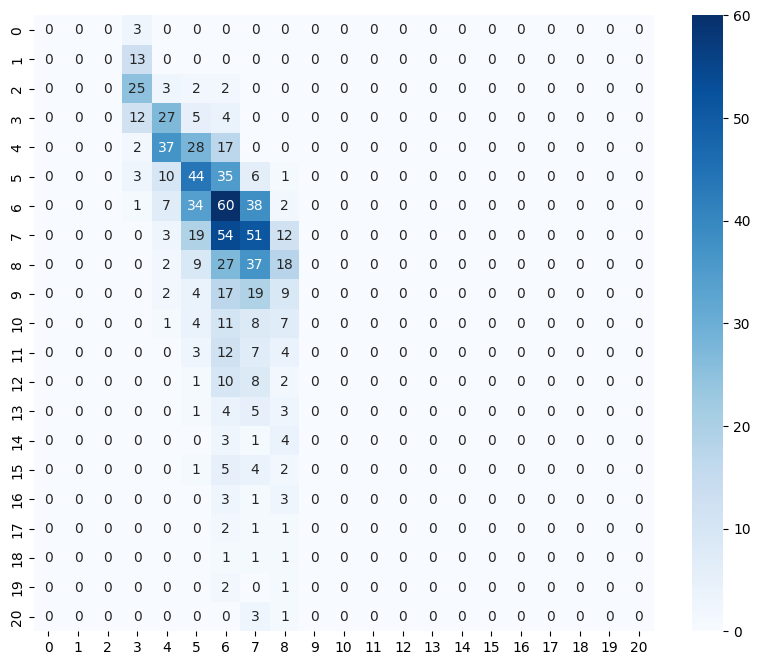

In [67]:
matrix = confusion_matrix(y_test, svc_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

#### K nejbližších sousedů (KNN)

In [68]:
accuracy_score(y_test, knn_predictions)

0.22966507177033493

In [69]:
display(precision_score(y_test, knn_predictions, average='micro', zero_division=0.0))
display(precision_score(y_test, knn_predictions, average='macro', zero_division=0.0))
precision_score(y_test, knn_predictions, average='weighted', zero_division=0.0)

0.22966507177033493

0.15935249100131674

0.22651110270972993

In [70]:
display(recall_score(y_test, knn_predictions, average='micro'))
display(recall_score(y_test, knn_predictions, average='macro'))
recall_score(y_test, knn_predictions, average='weighted')

0.22966507177033493

0.13114349787689777

0.22966507177033493

In [71]:
display(f1_score(y_test, knn_predictions, average='micro'))
display(f1_score(y_test, knn_predictions, average='macro'))
f1_score(y_test, knn_predictions, average='weighted')

0.22966507177033493

0.13467744515411922

0.22077764103009412

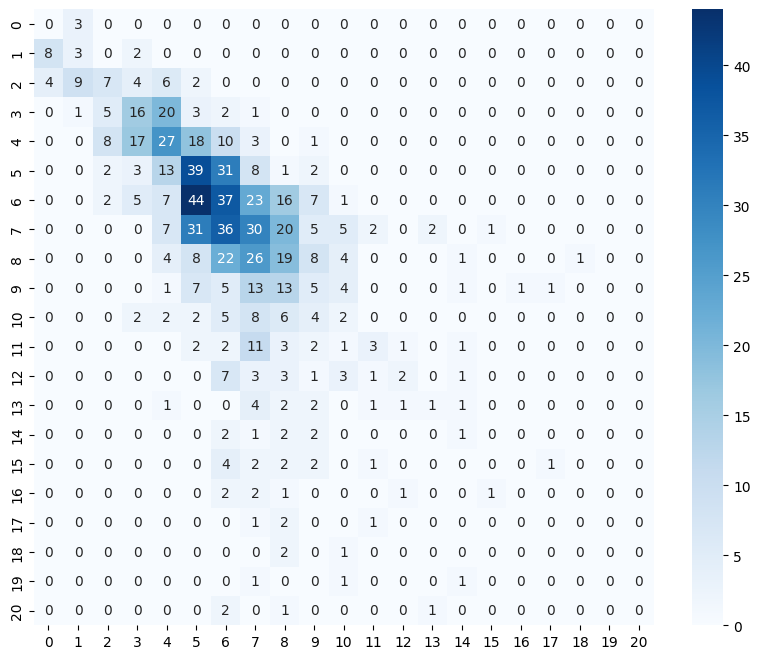

In [72]:
matrix = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.show()

### Ladění hyperparametrů

Jak jsme jistě viděli, naše modely nejsou zrovna kvalitní. Co s tím můžeme dělat? Nu, můžeme s tím dělat hned několik věcí. Za prvé se podívat na data a vyhodit nějaké fíčury, tudíž snížit dimenzionalitu. To často funguje. Nicméně druhou neoddílnou částí je ladění hyperparemetrů.            
V zásadě máme 4 možnosti. Můžeme naivně zkoušet každou kombinaci ručně. To nemusím snad ani demonstrovat na to, aby nám došlo, že je to na hovno.               
Další možnost je tzv. GridSearch. Ten za nás projde všechny kombinace hyperparametrů, které mu dáme, a vrátí nám tu nejlepší. To ale může trvat zatraceně dlouho a často zkoušíme i možnosti, o kterých předem víme, že nebudou lepší.                  
Rychlejší je RandomSearch. Ten vybere náhodně námi zadaný počet kombinací. Je to rychlejší, ale ne úplně efektivnější.              
V praxi se tedy využívá pouze poslední možnost, nepř. Optuna či Hyperopt. Tyto knihovny využívají pokročilé metody k tomu, aby našli tu nejlepší kombinaci hyperparametrů.          
Pro každý algoritmus si tedy ukážeme všechny tyto možnosti. Nejdéle se samozřejmě zdržíme u Optuny.

Ještě než začneme ladit hyperparametry, podíváme se na naši datovou sadu. Podle toho můžeme usoudit, jaký algoritmus bude nejspíš nejlepší a zda by se hodilo data normalizovat či standardizovat

In [143]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


V datech máme velmi malé odchylky, jednotky jsou velmi podobné. Pravděpodobně tudíž nebude potřeba normalizovat. Podíváme se ještě na rozdělení naší datové sady a podle toho se rozhodneme, zda chceme naši datovou sadu standardizovat.               
Co nás bude zajímat dál je vyvážení jednotlivých tříd. Zda nebude dobré se snažit, aby třídy v testovací a trénovací sadě měli podobné zastoupení.

In [144]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Vidíme, že nějaký oversampling nebude k zahození. Podíváme se teď na naše rozdělení. Dovedeme to pomocí KDE grafů. Ty jsou velmi podobné histogramům.

In [ ]:
import matplotlib.pyplot as plt

_df = df.drop(['Rings', 'Sex_F', 'Sex_I', 'Sex_M'], axis=1)


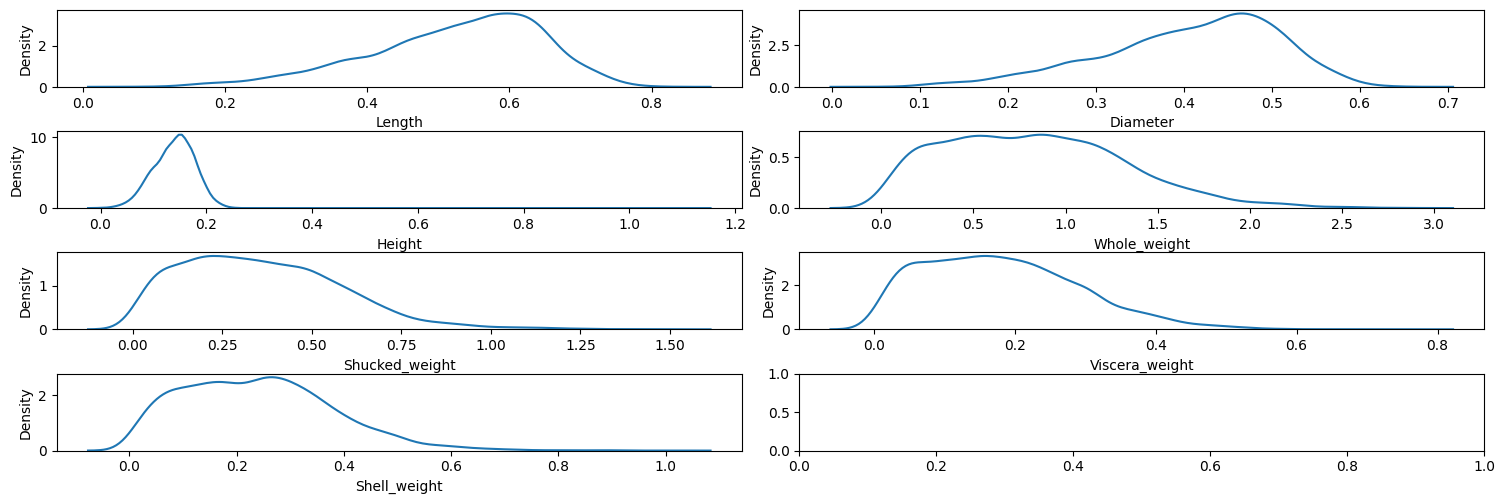

In [147]:
num_cols = 2
num_cols_pd = len(_df.columns)
num_rows = num_cols_pd//num_cols + num_cols_pd%num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))
plt.tight_layout()

for i, column in enumerate(_df.columns):
    j = i // num_cols
    sns.kdeplot(df[column], ax=axs[j, i%num_cols])

Data vypadají zhruba normálně distribuovaná, takže chtěli-li bychom, můžeme je standardizovat. Já to asi ale v zájmu jednoduchosti nechám být.                  
Jako další se podíváme na boxploty.

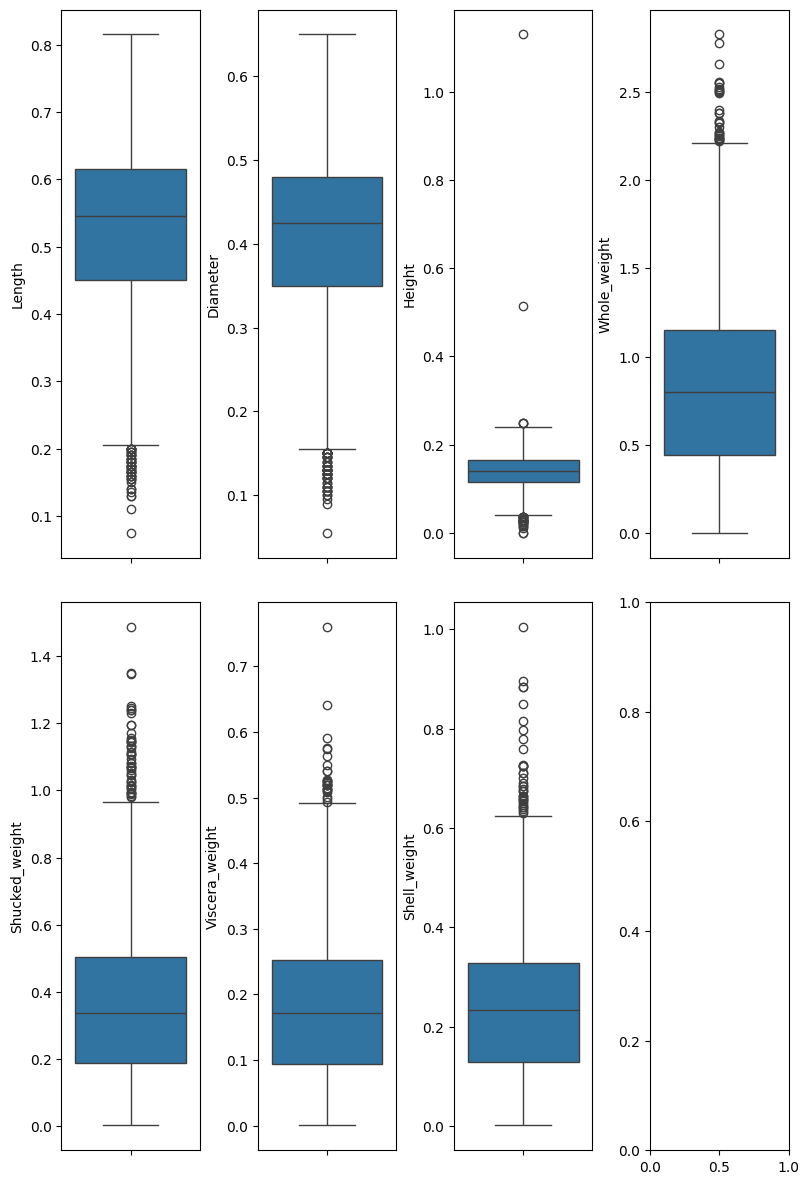

In [155]:
num_cols = 4
num_cols_pd = len(_df.columns)
num_rows = num_cols_pd//num_cols if num_cols_pd%num_cols == 0 else num_cols_pd//num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 12))
plt.tight_layout()

for i, column in enumerate(_df.columns):
    j = i // num_cols
    sns.boxplot(df[column], ax=axs[j, i%num_cols])

Zajímavé informace nám může poskytnout i scatter plot a následně korelační matice

<Figure size 1000x800 with 0 Axes>

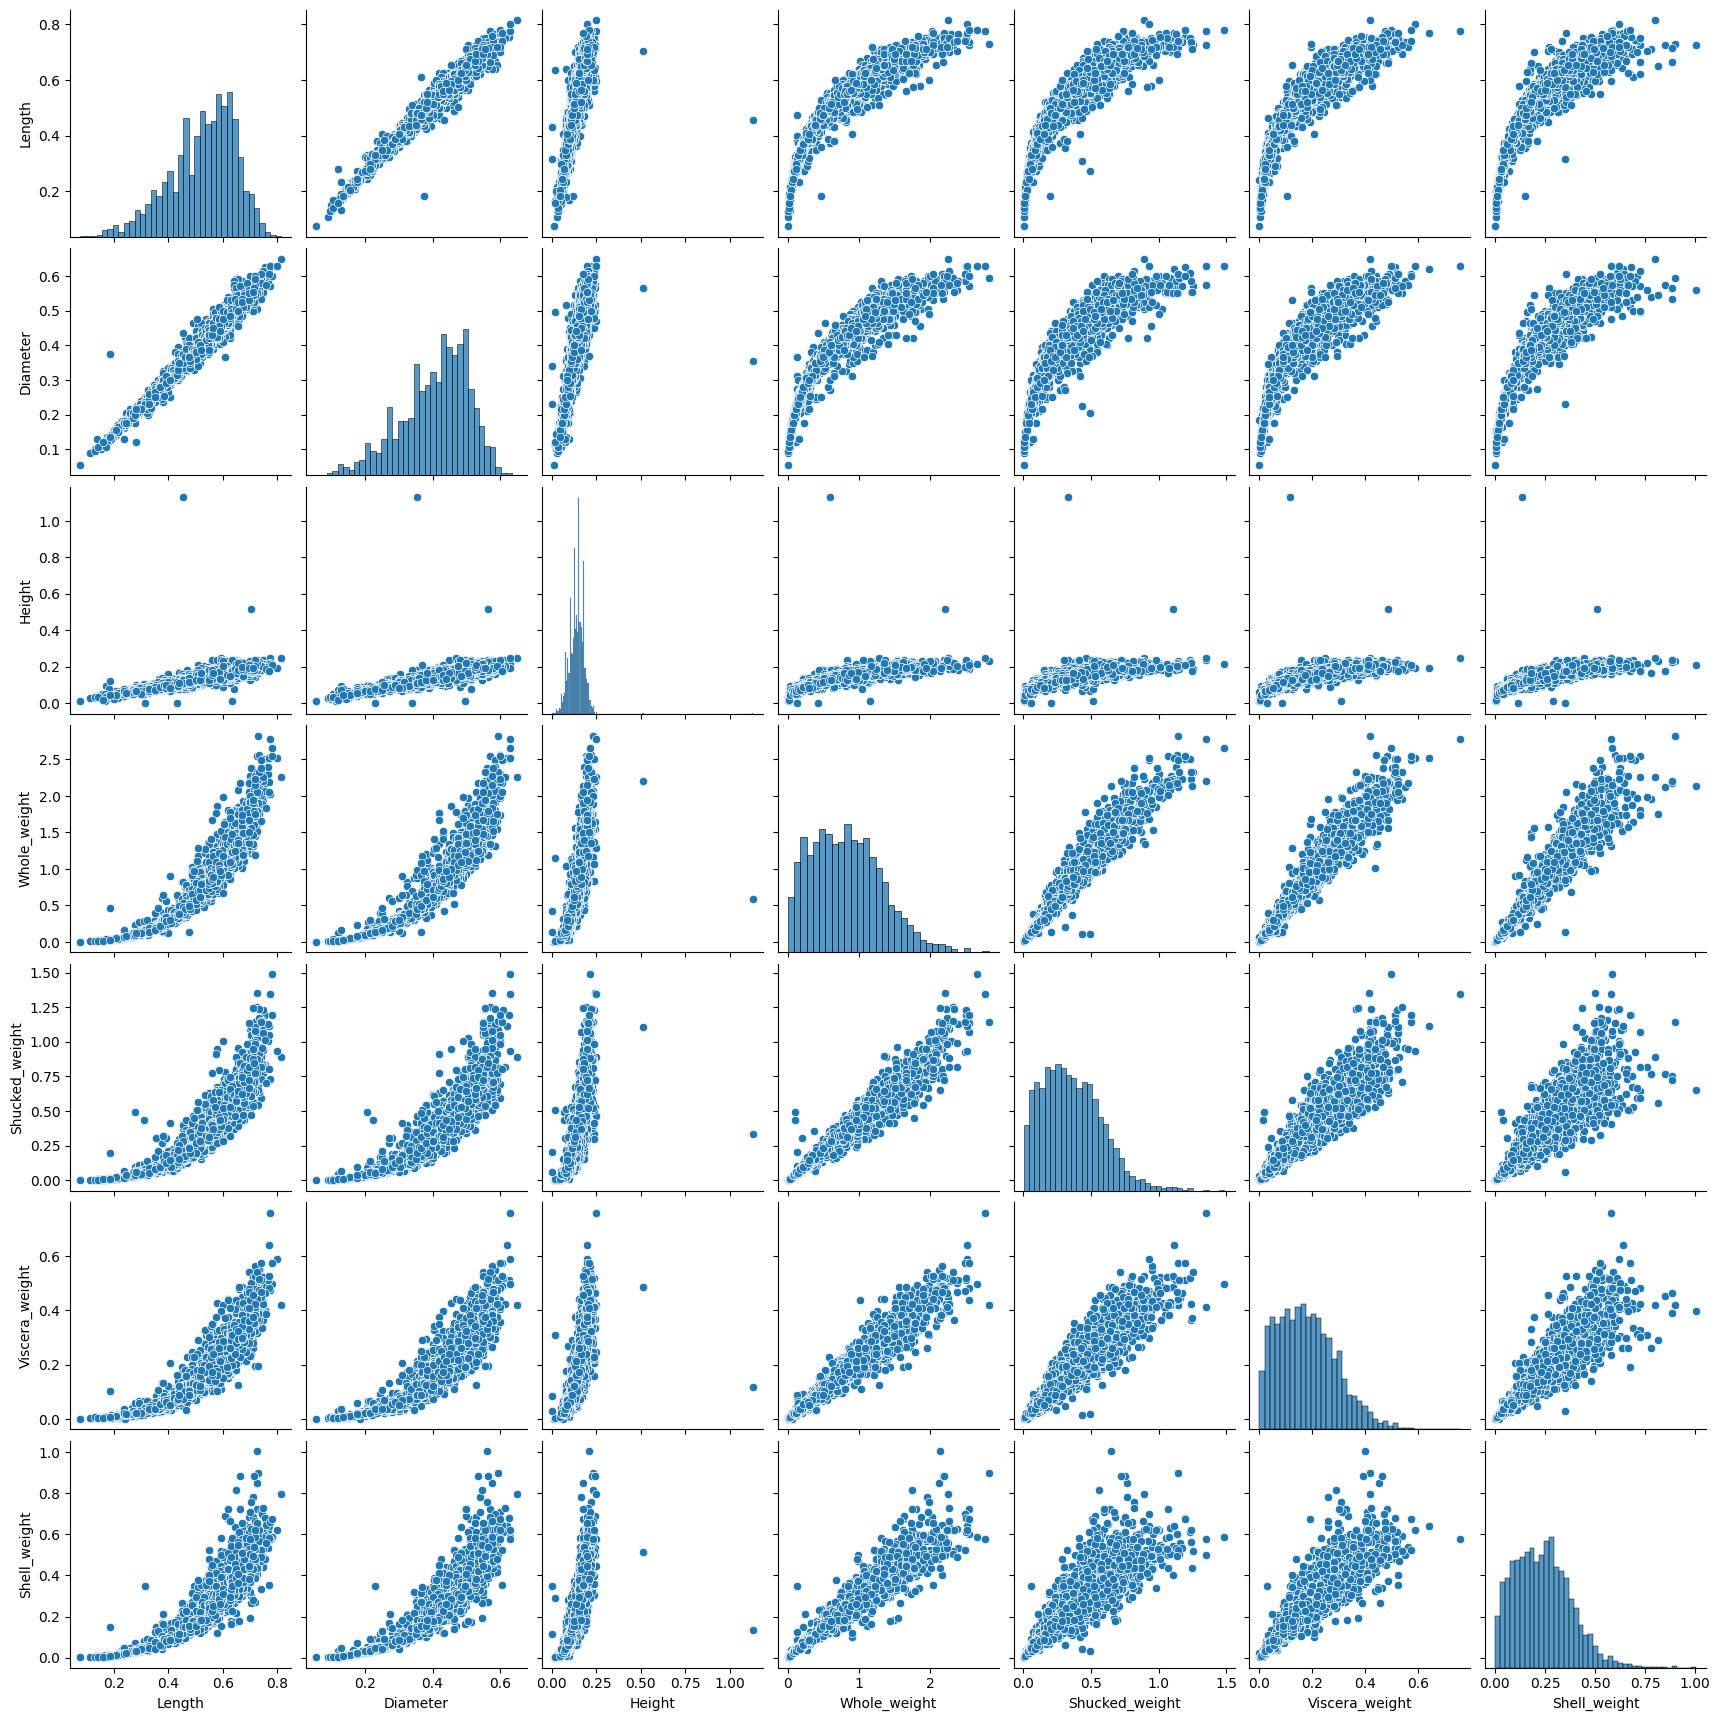

In [159]:
plt.figure(figsize=(10, 8))
sns.pairplot(_df)

<Axes: >

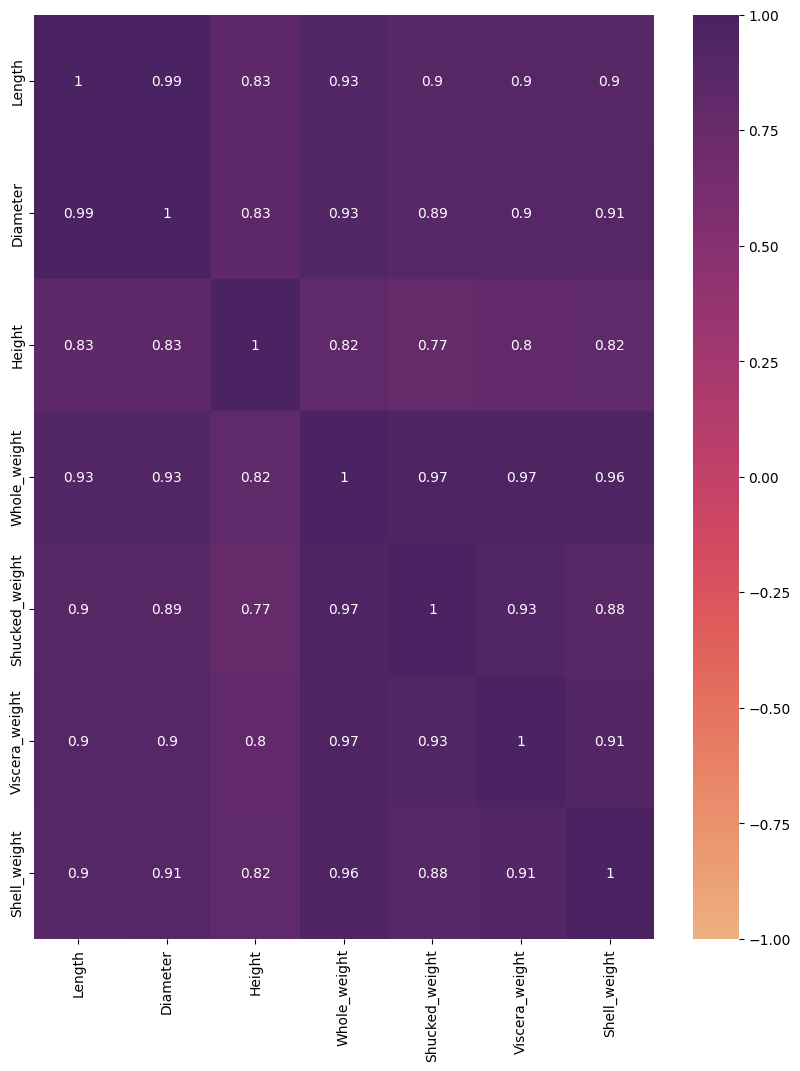

In [163]:
corr_matrix = _df.corr()

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap="flare", vmin=-1)

<Axes: >

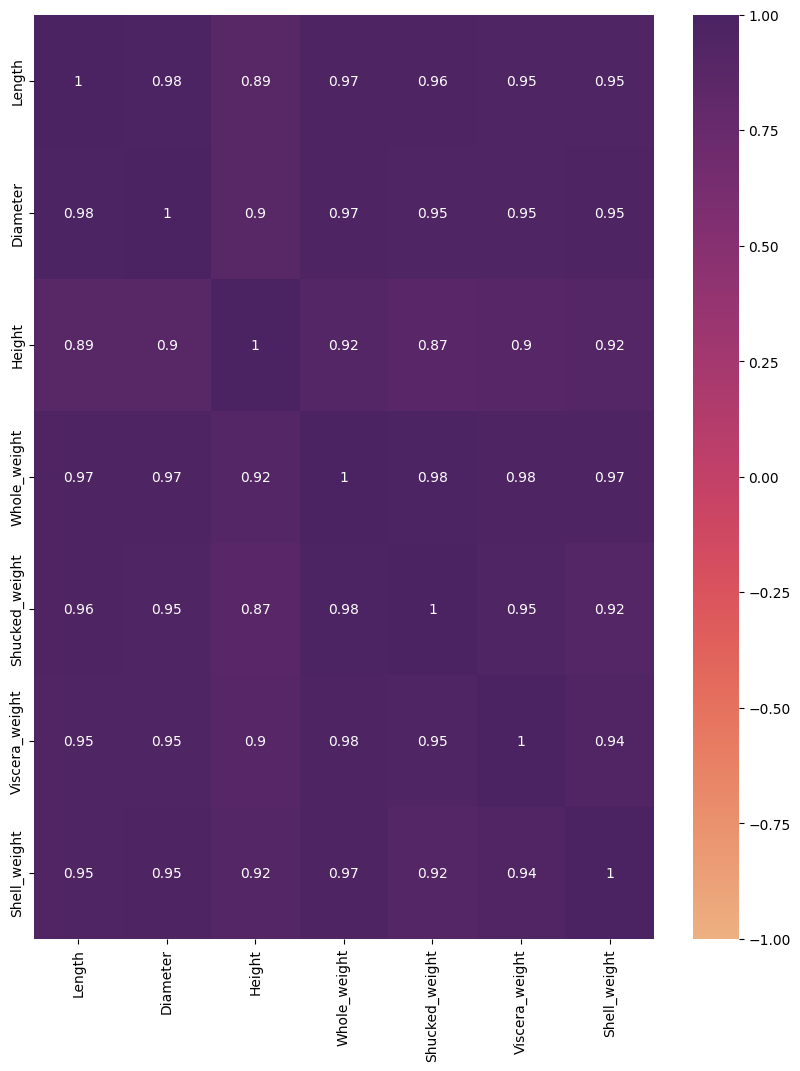

In [164]:
corr_matrix = _df.corr(method="spearman")

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap="flare", vmin=-1)

Vidíme, že data spolu velmi silně korelují. Dost pravděpodobně budeme tedy moci většinu vyhodit.                    
Pro účely ukázky ladění hyperparametrů ale nebudeme data dále upravovat. Můžete si samy zkusit, jestli vám to přinese lepší výsledky

In [5]:
from sklearn.model_selection import train_test_split

_X = X
_y = df['Rings']

_X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=42)
_X_train, _X_val, _y_train, _y_val = train_test_split(_X_train, _y_train, test_size=0.2, random_state=42)

#### Logistická regrese

U logistické regrese máme pár důležitých hyperparametrů.            
Prvním je typ regularizace. To je v podstatě úřoveň penalizace za chybu modelu. **penalty**          
Inverzní síla regularizace. Čím menší, tím silnější regularizace. **C**             
Optimalizační algoritmus. **solver**                
Ačkoliv jsou zde i další hyperparametry, nám budou pro ukázku stačit tyto.

In [217]:
param_grid = {
    "penalty": ["l2", "l1", "elasticnet", None],
    "solver": ["newton-cg", "liblinear", "sag", "saga"],
    "C": np.arange(0, 2, 0.1)
}

In [225]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_weighted",
    verbose=False
)

grid_search.fit(_X_train, _y_train)
_y_pred = grid_search.predict(_X_val)
f1_score(_y_val, _y_pred, average="weighted")

C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logis

0.24182818470752682

In [226]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_grid,
    n_iter=15,
    scoring="f1_macro",
    n_jobs=-1
)


random_search.fit(_X_train, _y_train)
_y_pred = random_search.predict(_X_val)
f1_score(_y_val, _y_pred, average="weighted")

C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

0.24710503156433183

In [7]:
import optuna
import tqdm
import time

for i in tqdm.tqdm(range(20)):
    time.sleep(1)

C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def objective(trial):
    parammeters = {
        "solver": trial.suggest_categorical('solver', ["newton-cg", "liblinear", "sag", "saga"]),
        "C": trial.suggest_float('C', 0.1, 2, step=0.1)
    }
    
    model = LogisticRegression(**parammeters)
    
    model.fit(_X_train, _y_train)
    
    preds = model.predict(_X_val)
    
    return f1_score(y_true=_y_val, y_pred=preds, average='weighted')


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, n_jobs=-1)

[I 2025-05-16 21:29:34,113] A new study created in memory with name: no-name-cd7cf996-eed4-4929-ba0f-f706887b7b2d
[I 2025-05-16 21:29:34,212] Trial 7 finished with value: 0.17702747821334047 and parameters: {'solver': 'liblinear', 'C': 0.30000000000000004}. Best is trial 7 with value: 0.17702747821334047.
[I 2025-05-16 21:29:34,214] Trial 6 finished with value: 0.17217654108161415 and parameters: {'solver': 'liblinear', 'C': 0.2}. Best is trial 7 with value: 0.17702747821334047.
[I 2025-05-16 21:29:34,217] Trial 0 finished with value: 0.21076913761342178 and parameters: {'solver': 'liblinear', 'C': 1.4000000000000001}. Best is trial 0 with value: 0.21076913761342178.
[I 2025-05-16 21:29:34,255] Trial 8 finished with value: 0.18415791511344307 and parameters: {'solver': 'sag', 'C': 0.2}. Best is trial 0 with value: 0.21076913761342178.
[I 2025-05-16 21:29:34,264] Trial 15 finished with value: 0.20317174298797597 and parameters: {'solver': 'liblinear', 'C': 0.8}. Best is trial 0 with val

Optuna nám mimo jiné dovoluje zobrazovat různé zajímavé grafy našeho trénování. My si ukážeme jen ty nejzajímavější.

In [11]:
optuna.visualization.plot_optimization_history(study)

In [12]:
optuna.visualization.plot_parallel_coordinate(study)

In [13]:
optuna.visualization.plot_slice(study)

In [14]:
optuna.visualization.plot_contour(study)

In [15]:
optuna.visualization.plot_param_importances(study)

#### Rozhodovací strom

#### Náhodný les

#### Support Vector Machine (SVM)

#### K nejbližších sousedů (KNN)